## $H \to \gamma \gamma$ Fit

This is an example of fitting the 2-photon invariant mass to determine the number of Higgs signal events.

We have a data set consists of ~ 30000 di-photon invariant mass values from a tetx file (**Hgg.txt**) which should be in the current directory. 

We perform a binned maximum likelihood fit (for reducing the CPU time) using RooFit.  

### 1. Reading Input data set

In [1]:
TTree tree("tree","tree");
int nevt = tree.ReadFile("data/Hgg.txt","x");
if (nevt <= 0) {
    Error("fitHgg","Error reading data from input file ");
}
std::cout << "Read " << nevt << " from the file " << std::endl;

Read 30770 from the file 


### 2.  Create of histogram representing the  data

We make an histogram with 100 bins from 110 to 160 where we fill the invariant mass data from the tree

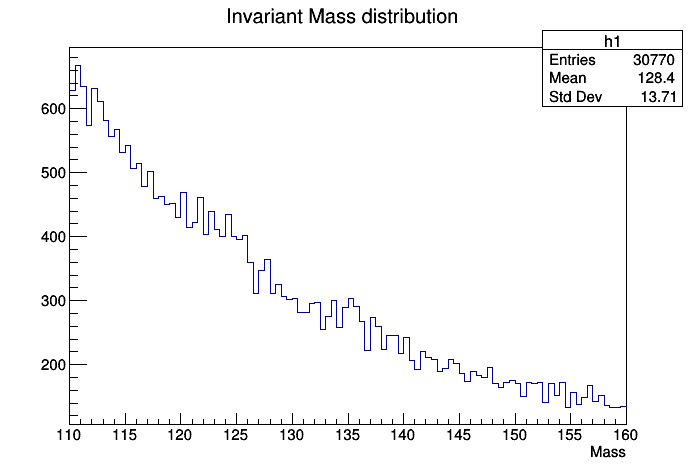

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [2]:
auto h1 = new TH1D("h1","Invariant Mass distribution;Mass;",100,110,160);
tree.Draw("x >> h1");
h1->Draw(); gPad->Draw();

### 3. Model creation

We make now the model using the capabilities of TF1 using the NSUM operator (normalized sum of functions). 

We assume a Gaussian distribution for the signal and a double  exponential distribution for the background as following: 

$$ P(x | \mu , \nu ) = n_{sig} \times G(x | M , \sigma) + n_{bkg} \times E(x|a_1,a_2)$$

where $G (x | M , \sigma)$ is the Gaussian distribution for the signal and $E(x|a_1,a_2)$ is the exponential distribution describing the background. 

$$E(x|a_1,a_2) = \frac{ e^{( - a1 * x/100 - a2 * (x/100)^2 )}}{\int e^{-(.....)} dx }$$ 

In [3]:
auto fsig = new TF1("fsig","[Constant]*TMath::Gaus(x,[Mass],[Sigma])");

In [4]:
auto fbkg = new TF1("fbkg","[Constant]*exp(-([a1]*x)/100.-[a2]*(x/100)*(x/100))");

In [5]:
auto fmodel = new TF1("model","NSUM(fsig,fbkg)",110,160);

### 4. Fit the data 

We do first a fit to the histogram using the bacground only function to get reasanable values for the parameters

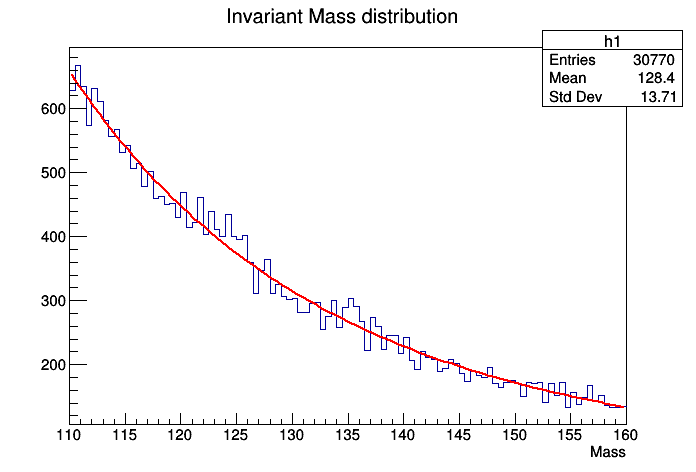

 FCN=54.4763 FROM MIGRAD    STATUS=CONVERGED     705 CALLS         706 TOTAL
                     EDM=4.98443e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.06721e+05   1.46258e+05   1.03461e+01  -2.03344e-07
   2  a1           7.65662e+00   5.46741e-01   2.25974e-05   1.18029e-01
   3  a2          -1.65020e+00   2.06545e-01   1.70941e-05   1.68232e-01
                               ERR DEF= 0.5


In [6]:
fbkg->SetParameter("Constant",1.E7);
fbkg->SetParameter("a1",8);
fbkg->SetParameter("a2",2);
fbkg->SetRange(110,160); fbkg->Draw();
h1->Fit(fbkg,"L");
gPad->Draw();

#### Full data fit using the created model (Higgs signal + background)

We first set initial parameter in the function

In [7]:
fmodel->Print("V")

Composition based function: model. Ndim = 1, Npar = 6 
List of  Parameters: 
               Coeff0 =    1.000000 
               Coeff1 =    1.000000 
                 Mass =    0.000000 
                Sigma =    0.000000 
                   a1 =    0.000000 
                   a2 =    0.000000 


In [8]:
fmodel->SetParameter("Coeff0",100);
fmodel->SetParameter("Coeff1",10000);
fmodel->SetParameter("Mass",124);
fmodel->SetParameter("Sigma",1);
fmodel->SetParameter("a1",fbkg->GetParameter("a1"));
fmodel->SetParameter("a2",fbkg->GetParameter("a2"));

Now we fit the histogram. We perform a Binned likelihood fit (option L)

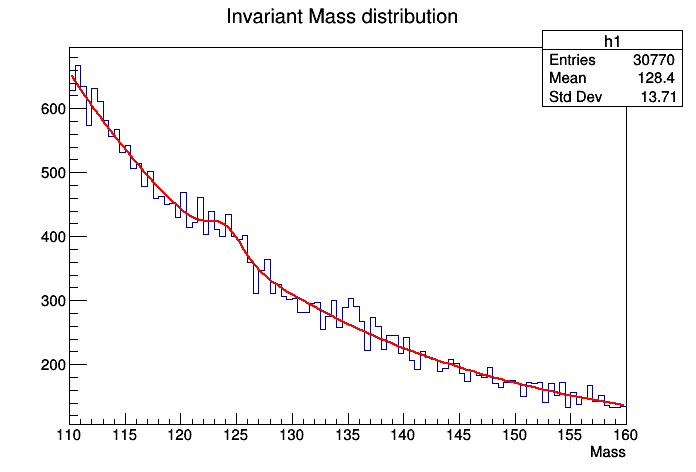

 FCN=47.2816 FROM MIGRAD    STATUS=CONVERGED     438 CALLS         439 TOTAL
                     EDM=2.02859e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Coeff0       1.38465e+02   4.74881e+01   1.57304e-01   8.89228e-07
   2  Coeff1       1.52468e+04   9.90382e+01   4.18454e-01  -4.91478e-07
   3  Mass         1.24082e+02   5.43537e-01   2.36556e-03   8.67132e-05
   4  Sigma        1.49393e+00   5.06967e-01   1.79900e-03  -2.26318e-04
   5  a1           8.63915e+00   8.99238e-01   1.98631e-04  -1.45447e-03
   6  a2          -2.02929e+00   3.40231e-01   7.49424e-05  -3.99939e-03
                               ERR DEF= 0.5


In [9]:
res = h1->Fit(fmodel,"L S");
fmodel->Draw();
h1->Draw();
gPad->Draw();

The number of signal/background events are equal to the Coefficients in the Normalized sum function divided by the bin width

In [10]:
double bw = h1->GetBinWidth(1);
std::cout << "Number of Higgs events = " << res->Parameter(0)/bw << " +/- " << res->ParError(0)/bw << std::endl;
std::cout << "Number of Backg. events = " << res->Parameter(1)/bw << " +/- " << res->ParError(1)/bw << std::endl;

Number of Higgs events = 276.93 +/- 94.9761
Number of Backg. events = 30493.6 +/- 198.076


### 4. Compute the Significance

For computing the significance we look at the Delta of the Likelihood obtained by fitting fixing the number of signal events to be zero and the full fit. 
The significance is equal to $\sqrt {\Delta logL}$.

We do then a background only fit 

In [11]:
auto fmodel2 = new TF1(*fmodel); 
fmodel2->FixParameter(0,0);
fmodel2->FixParameter(2, res->Parameter(2));
fmodel2->FixParameter(3, res->Parameter(3));
fmodel2->SetLineColor(kBlue); 

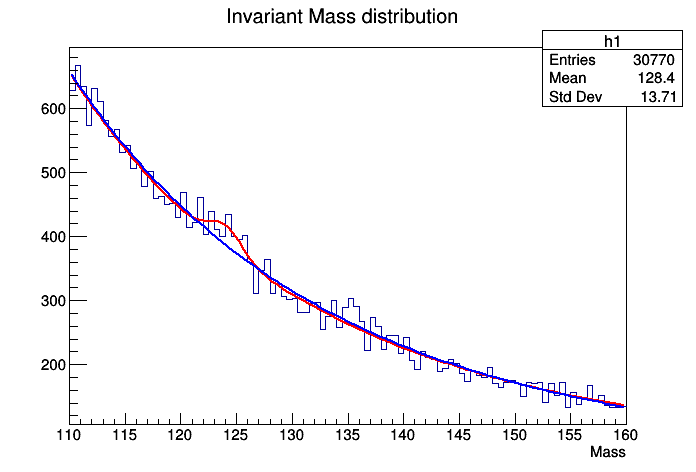

 FCN=54.4763 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=2.36908e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Coeff0       0.00000e+00     fixed    
   2  Coeff1       1.53852e+04   8.77083e+01   4.48973e-01  -3.80926e-08
   3  Mass         1.24082e+02     fixed    
   4  Sigma        1.49393e+00     fixed    
   5  a1           7.65633e+00   8.41843e-01   2.12848e-04  -3.53384e-04
   6  a2          -1.65010e+00   3.17685e-01   8.03222e-05  -9.45216e-04
                               ERR DEF= 0.5


In [12]:
res2 = h1->Fit(fmodel2,"L S +");
gPad->Draw();

In [13]:
std::cout << "Significance is = " << sqrt( res2->MinFcnValue() - res->MinFcnValue() ) << std::endl;

Significance is = 2.68229
